# Project Overview and Business Problem

The overall goal of this project was to utalized machine learning classification techniques to predict the individual diagnoses of Alzheimer's Disease severity from a single cross-sectional structural brain MRI scan. A convolutional neural network (CNN) was built out and trained on pre-diagnosed MRI images acquired using a 1.5 Tesla MRI scanner that were sourced from various seperate studies. The final model showed high performance (ACCURACTY PERCENT) on accurately classifying the severity of an alzhimer's disease into the four target categories; "No Impairment", "Very Mild Impairment", "Mild Impairment", and "Moderate Impairment". CNNS and other machine learning models are powerful tools that may be able to reduce the load on clinicians by aiding in the individual diagnosis of patients along the AD continuum. 

**
One of the most important caveats of previous works is the single-center origin of imaging data that limits the generalizability of findings. In light of this, one of the main goal and novelty of our study was to overcome this limit by comparing data from different centers, neuroimaging protocols and scanners, in order to reach both reliability and reproducibility of results.


# Background 

Alzheimer's Disease (AD) is a the most common neurodegenerative disorder effecting about 1 in 9 people over the age of 65 and older with estimates that the population of those living with AD will just about double by 2050 compared to current numbers[1]. AD is the leading cause of dementia, being associated with up to 80% of all dementia diagnosises. Dementia is the clinical syndrome characterized by progressive decline in two or more cognitive domains, including memory, language, executive and visuospatial function, personality, and behavior, these can cause the loss of abilities to perform instrumental and/or basic activities of daily living[3].


Mild cognitive impairment (MCI) is the prodromal form of AD and is characterized by neurocognitive dysfunction, but not to the extent of dementia, and minor difficulties in functional ability. 

Magnetic Resonance Imaging (MRI) is a vital resource used in the clincial assement of patients with suspected Alzheimer disease, allowing clinicans to observe in vivo visualization of the neuropathology. Diagnostic criteria recommend the consideration of structural abnormalities visible through MRI, atrophy of the medial temporal structures as well as others are now considered valid diagnositc markers. More advanced magnetic resonance techniques such as magnetic resonance spectroscopy (MRS), diffusion tensor imaging (DTI), and functional magnetic resonance imaging (fMRI) exist but have not yet implemented into standard clinical use.
**

Several studies have shown that atrophy estimates in characteristically vulnerable brain regions, particularly the hippocampus and entorhinal cortex, reflect disease stage and are predictive of progression of mild cognitive impairment (MCI) to AD (Frisoni et al., 2010)

Structural imaging modalities such as MRIs can reveal brain atrophy and other static tissue abnormalities. Progression of atrophy follows the Braak staging diagnostic scheme for AD and is first observed in medial temporal lobe structures, including the entorhinal cortex and hippocampus. As the disease progresses, atrophy advances to the point in which grey matter loss occurs in the medial temporal gyrus, parahippocampus, parahippocampal and fusiform gyri, and temporal pole.

Structural MRI scans can also display white matter hyperintensities (WMHs), which indicate demyelination and axonal loss. Compared to controls, patients with AD demonstrate greater WMHs with the majority in frontal lobe. For patients along the AD spectrum, WMHs correlate with hippocampal atrophy, in addition to neuropsychological impairment and psychiatric disturbances.

sources: 
1. https://www.alz.org/alzheimers-dementia/facts-figures#:~:text=More%20than%206%20million%20Americans%20of%20all%20ages%20have%20Alzheimer's,older%20(10.7%25)%20has%20Alzheimer's.
2. Chandra A, Dervenoulas G, Politis M; Alzheimer’s Disease Neuroimaging Initiative. Magnetic resonance imaging in Alzheimer's disease and mild cognitive impairment. J Neurol. 2019;266(6):1293-1302. doi:10.1007/s00415-018-9016-3
3.Weller J, Budson A. Current understanding of Alzheimer's disease diagnosis and treatment. F1000Res. 2018;7:F1000 Faculty Rev-1161. Published 2018 Jul 31. doi:10.12688/f1000research.14506.1

# Model Performance




# Database Understanding


This dataset is comprised of 6400 pre-labeled axial MRIs from various sources which were classified into four levels of AD severity: "No Impairment", "Very Mild Impairment", "Mild Impairment", and "Moderate Impairment". Each category had 3200, 2240, 896, and 64 MRI images, respectively.

The present dataset was was uploaded to [Kaggle.com](https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images/) by Sarvesh Dubey in 2019. The MRI images were acquired using a 1.5 Tesla MRI scanner with a T1-weighted sequence. The images have a resolution of 176×208 pixels and are in the “.jpg” format. All images have been pre-processed to remove the skull.

It is important to note that the exact methods of how and from where these MRIs were collected as well as their preprocessing procedure was not well documented and therefore this dataset should not be used for journal publications and the results of the trained final model may vary from a real world scenario.



## Loading and Viewing Data


In [109]:
#Importing Packages and modules

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline


import pandas as pd
import numpy as np
import os, shutil
import numpy as np
from math import ceil
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
from pathlib import Path
from PIL import Image
import PIL

from skimage.feature import hog
from skimage import exposure
from skimage.transform import resize

import keras
from keras import models
from keras import layers
from keras.datasets import mnist
from tensorflow.keras import Sequential, Input
from keras.layers import Dense, Dropout, Conv2D, Flatten
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, MaxPool2D, GlobalAveragePooling2D
from keras.optimizers import RMSprop
from keras.optimizers import Adam, SGD
from keras.metrics import Recall, Precision 
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

tf.random.set_seed(42)
np.random.seed(42)


In [2]:
#Defining data Directories for ease of use
all_images_directory = 'data/all'
train_directory = 'data/train/'
test_directory = 'data/test/'


In [111]:
#Creating Dataframe for Data

#Pulling Paths for all images in testing set via recursive globbing
paths = [path.parts[-3:] for path in
         Path(all_images_directory).rglob('*.jpg')]

#Turning pulled path data into Dataframe
df = pd.DataFrame(data=paths, columns=['Folder', 'AD Label', 'Image'])
df

,Folder,AD Label,Image
0,all,No Impairment,nonDem1498.jpg
1,all,No Impairment,nonDem2191.jpg
2,all,No Impairment,26 (81).jpg
3,all,No Impairment,nonDem2185.jpg
4,all,No Impairment,27 (81).jpg
...,...,...,...
6395,all,Mild Impairment,mildDem649.jpg
6396,all,Mild Impairment,mildDem661.jpg
6397,all,Mild Impairment,mildDem107.jpg
6398,all,Mild Impairment,mildDem113.jpg


In [58]:
#Pulling images from the data directory and resizing
data = ImageDataGenerator(rescale=1/255).flow_from_directory(all_images_directory,
                                target_size = (224, 224),
                                batch_size = 6400,
                                seed = 42, shuffle=False)

#Defining class names for ease of use
classes = data.class_indices.keys()

#Printing out classes
data.class_indices

Found 6400 images belonging to 4 classes.


{'Mild Impairment': 0,
 'Moderate Impairment': 1,
 'No Impairment': 2,
 'Very Mild Impairment': 3}

In [ ]:
#Seperating Labels from images
images, labels = next(data)

#Printing examples of labels
print(labels[[0,900,1200,6350]])

The data labels have been one hot encoded into arrays of 4 digits representing the classes. These class codes are not intuitive so the next step is to build a helper function to quickly convert these class codes into the actual diagnosis for readability.

In [18]:
#Class codes and their labels for reference while building function
# [0.0, 0.0, 1.0, 0.0]: 'No Impairment',
# [0.0, 0.0, 0.0, 1.0]: 'Very Mild Impairment',
# [1.0, 0.0, 0.0, 0.0]: 'Mild Impairment',
# [0.0, 1.0, 0.0, 0.0]: 'Moderate Impairment' 


def class_code_to_label(class_code):
    '''
    Takes in a array that represents the class of an image in the AD dataset and replaces it with the string 
    that represents the class name.
    
    This was created so that the figures created for this project can easily be labeled with the AD diagnosis rather
    than the class code
    '''
    if class_code[2] == 1:
        return 'No Impairment'
    elif class_code[3] == 1:
        return 'Very Mild Impairment'
    elif class_code[0] == 1:
        return 'Mild Impairment'
    elif class_code[1] == 1:
        return 'Moderate Impairment'


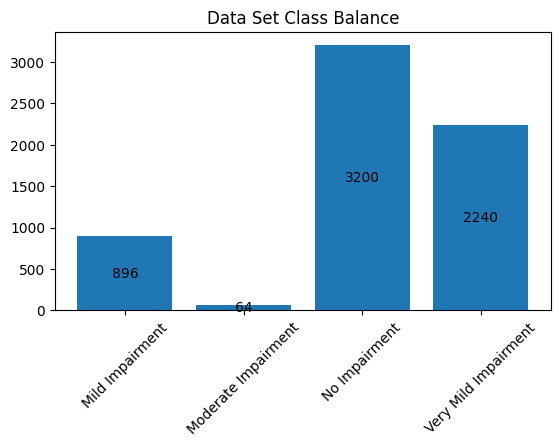

In [60]:
#Checking Class Balance 

bars = plt.bar(['Mild Impairment','Moderate Impairment','No Impairment','Very Mild Impairment'], sum(labels))
plt.xticks(rotation=45)
plt.title('Data Set Class Balance');
plt.gcf().subplots_adjust(bottom=0.3)
plt.bar_label(bars, label_type='center')
plt.savefig('./figures/dataset_class_balance.png')

The overall dataset is not balanced and will need to be balanced out before modeling

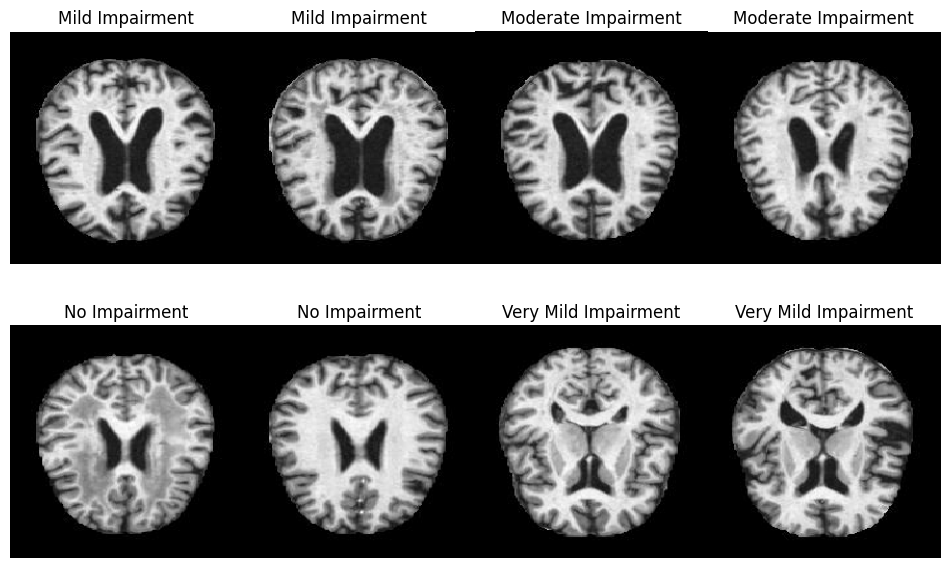

In [61]:
#List of 2 of each class for viewing sample
sample_image_indexes = [0,1,900,901,1200,1201,6349,6350]

#Plotting 8 Sample images
plt.figure(figsize=(12,7))
for num, index in enumerate(sample_image_indexes):
    plt.subplot(2,4,num+1)
    plt.gca().set_title(class_code_to_label(labels[index]))
    plt.axis('off')
    plt.subplots_adjust(wspace=0)
    plt.imshow(images[index])

# Exploratory Data Analysis

A deep dive into the data will allow for a greater overall understanding of the data and help provide clues for what steps will need to be taken to produce the best possible model.

The classes will be seperated in order to better understand the differences between them. An average image as well as histograms of oriented gradients for each classification will be created and then compared to the other classes. 

In [32]:
#Creating Class based Datasets for class comparisons

#Creating Mild Dataset
mild_data = ImageDataGenerator(rescale=1./255).flow_from_directory(all_images_directory,
                                target_size = (176, 208),
                                batch_size = 896,
                                seed = 42, classes=['Mild Impairment'])
#Creating Moderate Dataset
moderate_data = ImageDataGenerator(rescale=1./255).flow_from_directory(all_images_directory,
                                target_size = (176, 208),
                                batch_size = 64,
                                seed = 42, classes=['Moderate Impairment'])
#Creating No Impairment Dataset
no_impair_data = ImageDataGenerator(rescale=1./255).flow_from_directory(all_images_directory,
                                target_size = (176, 208),
                                batch_size = 3200,
                                seed = 42, classes=['No Impairment'])
#Creating Very Mild Dataset
very_mild_data = ImageDataGenerator(rescale=1./255).flow_from_directory(all_images_directory,
                                target_size = (176, 208),
                                batch_size = 2240,
                                seed = 42, classes=['Very Mild Impairment'])



Found 896 images belonging to 1 classes.
Found 64 images belonging to 1 classes.
Found 3200 images belonging to 1 classes.
Found 2240 images belonging to 1 classes.


In [34]:
#Seperating images and labels
mild_images, mild_labels = next(mild_data)
moderate_images, moderate_labels = next(moderate_data)
no_impair_images, no_impair_labels = next(no_impair_data)
very_mild_images, very_mild_labels = next(very_mild_data)

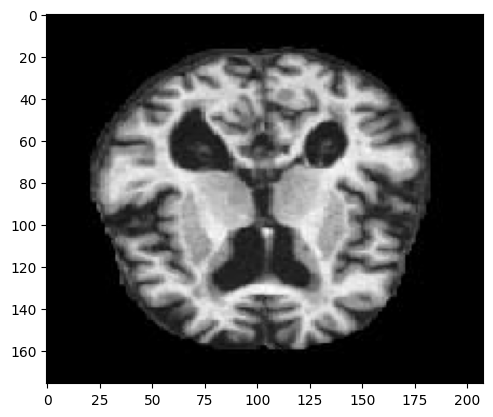

In [35]:
plt.imshow(mild_images[1])


### Finding Average Image of each Class

In order to elucidate key structural differences between the classes, the average image for each class will be computed. Each average image will then be compared with each class in order to see the average structual differences between the different AD severity levels.

In [36]:
def create_average_image(images):
    '''
    Input a series of images or arrays that correspond to images and the output is two values, 
    the average array and the average image of all inputs
    '''
    #Turn each input image into an array
    images_arrays = np.array([np.array(im) for im in images])
    #Find the average of all of the arrays to create average image
    average_array = np.mean(images_arrays,axis=0)
    #Create image from average array and multiply by 255 for uint8 conversion
    ave_image = Image.fromarray((average_array*255).astype('uint8'))
    return average_array, ave_image

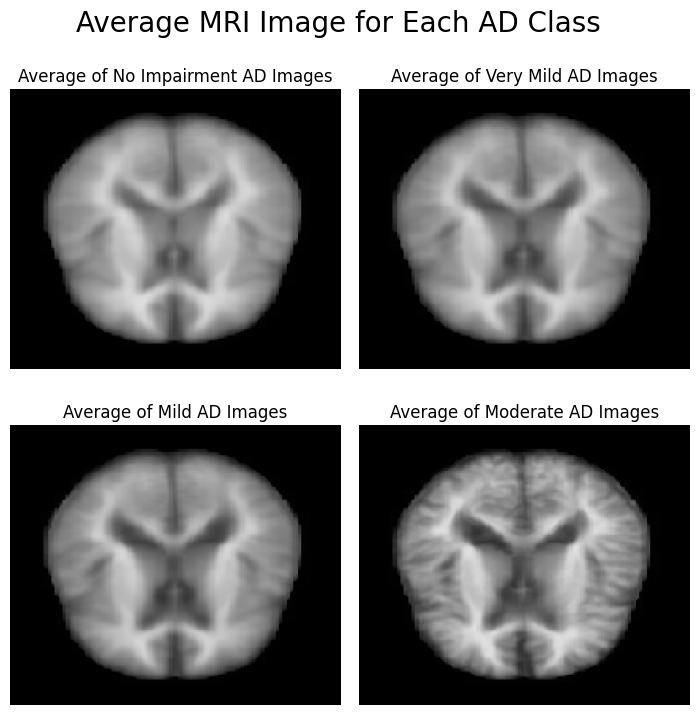

In [37]:
#Creating an Average image for each class
mild_mean_array, mild_mean_img = create_average_image(mild_images)
moderate_mean_array, moderate_mean_img = create_average_image(moderate_images)
no_impair_mean_array, no_impair_mean_img = create_average_image(no_impair_images)
very_mild_mean_array, very_mild_mean_img = create_average_image(very_mild_images)


#Visualizing all Average Images
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9,8))
fig.suptitle('Average MRI Image for Each AD Class', size=20)
fig.subplots_adjust(wspace=0)

#Plotting No Impairment image
ax[0,0].imshow(no_impair_mean_array)
ax[0,0].set_title("Average of No Impairment AD Images")
ax[0,0].axis('off')

#Plotting Very Mild image
ax[0,1].imshow(very_mild_mean_array)
ax[0,1].set_title("Average of Very Mild AD Images")
ax[0,1].axis('off')

#Plotting Mild image
ax[1,0].imshow(mild_mean_array)
ax[1,0].set_title("Average of Mild AD Images")
ax[1,0].axis('off')

#Plotting Moderate image
ax[1,1].imshow(moderate_mean_array)
ax[1,1].set_title("Average of Moderate AD Images")
ax[1,1].axis('off')

plt.savefig('./figures/Class_Mean_Images.png')

Upon first glance it seem that atrophy increases as the severity of AD increases, this is evident in the loss of dense tissue as severity increases. In order to better understand the differences the images will compared directly.

# Comparing all Average Images


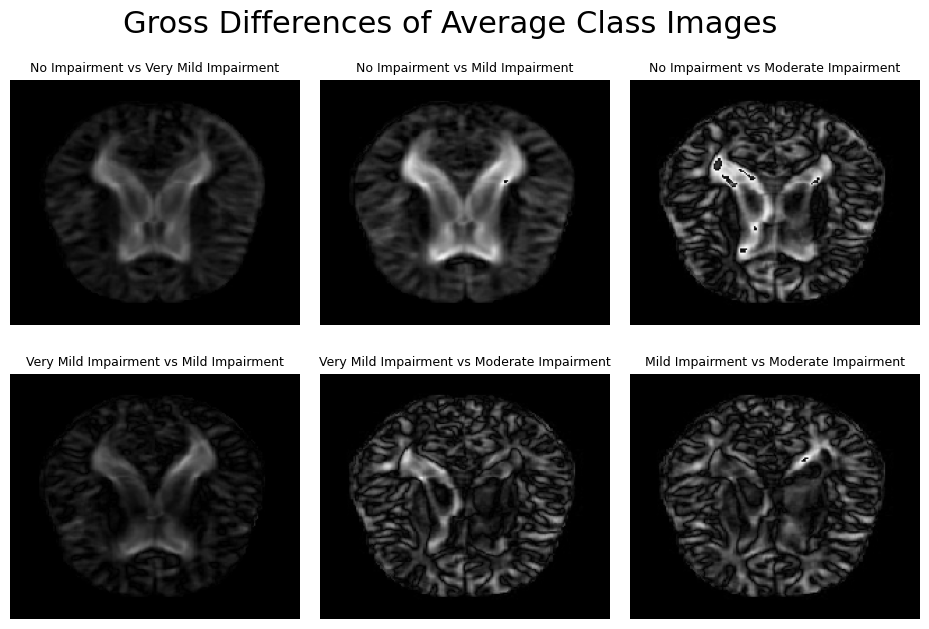

In [38]:
mean_arrays_dict = {'No Impairment': no_impair_mean_array, 
                    'Very Mild Impairment': very_mild_mean_array,
                    'Mild Impairment': mild_mean_array,
                    'Moderate Impairment':moderate_mean_array}
    
#Creating list of Mean image arrays to be looped through
mean_arrays_values =  list(mean_arrays_dict.values())
mean_arrays_keys = list(mean_arrays_dict.keys())

def compare_arrays(array1, array2):
    '''
    Input two different arrays that correspond to images, the array2 will be subtracted from array1 to create a 
    new array that represents the difference between to images. The new array is then converted into uint8 form. 
    
    The output is an array equal to the difference of the input array.
    '''
    #Subtracting moderate mean image from no impairment image to find differences
    difference_of_arrays = abs(array1 - array2)
    #Multipling resulting image by 255 for uint8 conversion
    compared_array = (difference_of_arrays*1020).astype(np.uint8)
    #plt.title(f"{array1} vs {array2}")
    return compared_array


compared_arrays = []

plt.figure(figsize=(12,7))
plt.suptitle('Gross Differences of Average Class Images', size=22)

ax = 0 

for i in range(len(mean_arrays_dict)):
    for j in range(i + 1, len(mean_arrays_dict)):
            img = compare_arrays(mean_arrays_values[i], mean_arrays_values[j])
            plt.subplot(2,3,ax+1)
            plt.subplots_adjust(wspace=0)
            compared_arrays.append(img)
            #Create title in string format"
            plt.gca().set_title('{:s} vs {:s}'.format(mean_arrays_keys[i] ,mean_arrays_keys[j]), fontsize=9)
            plt.axis('off')
            plt.subplots_adjust(wspace=0)
            plt.imshow(img)
            ax+=1
        
plt.savefig('./figures/Class_Mean_Comparisons.png')

In the figure above, lighter spots represent a greater difference, while darker spots represent less difference between the comparative images. Examining the top row, which compares no impairment to the other groups, it is clear that as AD severity increases, the structure of the brain changes more from the control group. 


It is important to note that the white color does not represent atrophy directly but simply differences between the color values in the images being compared. The trend within this figure is that structure changes are most drastic in more severe cases of AD when compared with the No Impairment group

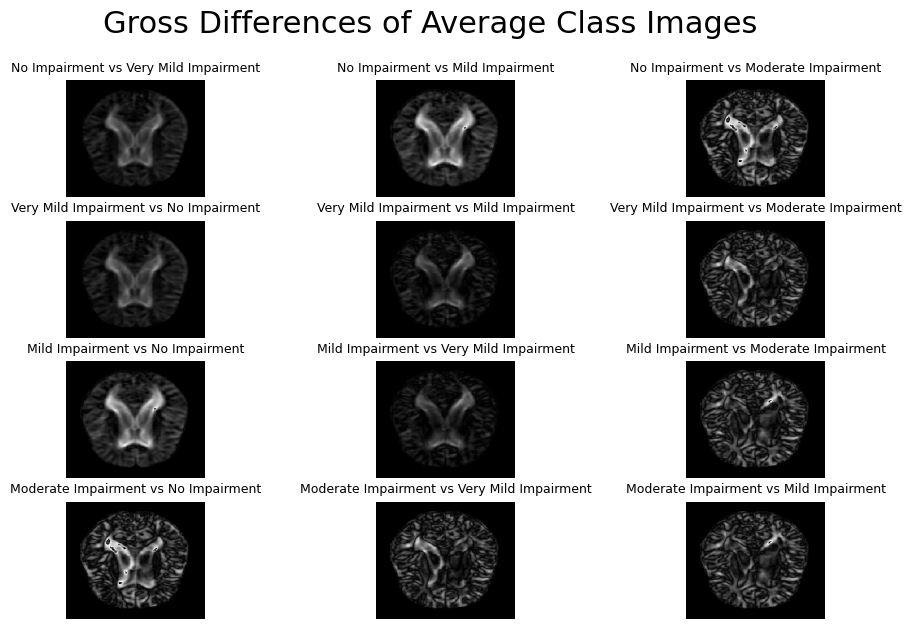

In [39]:
plt.figure(figsize=(12,7))
plt.suptitle('Gross Differences of Average Class Images', size=22)

ax = 0 

for i in range(len(mean_arrays_dict)):
    for j in range(len(mean_arrays_dict)):
        if i == j:
            continue
        else:
            img = compare_arrays(mean_arrays_values[i], mean_arrays_values[j])
            plt.subplot(4,3,ax+1)
            plt.subplots_adjust(wspace=0)
            compared_arrays.append(img)
            #Create title in string format"
            plt.gca().set_title('{:s} vs {:s}'.format(mean_arrays_keys[i] ,mean_arrays_keys[j]), fontsize=9)
            plt.axis('off')
            plt.subplots_adjust(wspace=0)
            plt.imshow(img)
            ax+=1
        
plt.savefig('./figures/Class_Mean_Comparisons.png')

## Feature Description through Histograms of Oriented Gradients 

Histograms of Oriented Gradients (HOGs)are feature descriptors that focus on the structure of an image and extract information on edge magnitudes as well as edge orientation in order to extract the most important information in the image.

In the current project HOGs will be used in order to compare the feature differences between classes. A model will also be trained on HOGs to test if this increases accuracy for the model through simplifing the input when compared with a the original image.

In [40]:
#Viewing Current image size
image = no_impair_mean_array
image.shape

(176, 208, 3)

In [42]:
def create_hog(image_array):
    '''
    Input is an array that corresponds to an image. the array is then process through sci-kit image hog function
    and then its rescales the exposure of the image. 
    
    Output is the hog image as well as t
    '''
    fd, hog_image = hog(image_array, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(3, 3), visualize=True, channel_axis=2)
    h_image2 = exposure.rescale_intensity(hog_image, in_range=(0,.02))
    return h_image2 , fd



In [43]:
no_impair_hog, no_impair_hog_fd  = create_hog(no_impair_mean_array)
very_mild_hog, very_mild_hog_fd = create_hog(very_mild_mean_array)
mild_hog, mild_hog_fd = create_hog(mild_mean_array)
moderate_hog, moderate_hog_fd = create_hog(moderate_mean_array)

In [44]:
hog_list = [no_impair_hog, very_mild_hog, mild_hog, moderate_hog]

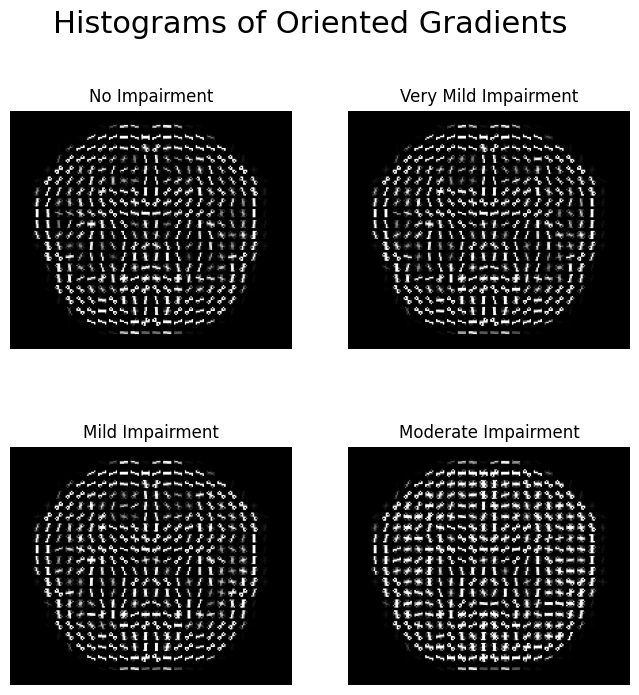

In [47]:
fig = plt.figure(figsize=(8,8) )
fig.suptitle("Histograms of Oriented Gradients", size=22)

hog_titles = ['No Impairment','Very Mild Impairment','Mild Impairment','Moderate Impairment']

for num, hog in enumerate(hog_list):
    fig.add_subplot(2,2,num+1)
    plt.title(hog_titles[num])
    plt.imshow(hog, cmap='Greys_r')
    plt.axis('off')

plt.savefig('./figures/Class_Mean_HOGs.png')

It is subtle but it can be seen that there are stronger gradients as AD severity progresses, this is evident by the increase in overall brightness along with additional orientations of the gradients in the more severe photos.

# Modeling

Before modeling can commence there are a few remaining steps that will need to be taken such as splitting the data set into a training, testing and validation group as well as building out a number of functions to help with model evaluation.

In [48]:
#Model Evaluation Helper Functions

def visualize_model_performance(results):
    '''
    Input is the results after fitting a CNN Sequential model and the output are two graphs, one plots the loss by epoch
    for the training and validation datasets and the second plots a similar graph for accuracy rather than loss.
    '''
    history = results.history
    
    #final_epoch_stats(results)
    
    plt.figure(figsize=(10,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Graph of Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(10,4))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Graph of Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()



def make_confusion_and_classification(model, model_name):
    '''
    The Inputs for this fuction are a model prior to being fit and a string that will act as the title of the
    visualization. The output creates a heatmapped confusion matrix as well as a classification report for the model.
    The testing set (X_test, y_test) is used for these visualizations, so that the metrics are based on data that is
    novel to the model.
    '''
    
    #Show model.evaluate results 
    eval_metrics = model.evaluate(X_train, y_train, verbose=0)
    print('The Accuracy for the training group was', eval_metrics[1]*100)
    print('The Loss for the training group was', eval_metrics[0])
    print('--------------------------------------')
    eval_metrics = model.evaluate(X_test, y_test, verbose=0)
    print('The Accuracy for the test group was', eval_metrics[1]*100)
    print('The Loss for the test group was', eval_metrics[0])
    
    #Make Predictions for model
    preds = model.predict(X_test)
    #Converting label predictions with argmax to show sentiment label
    preds = np.argmax(preds, axis=1)
    #Converting actual labels with argmax to match predictions
    y_test_arg=np.argmax(y_test, axis=1)
    #Create confusion matrix
    conmat = tf.math.confusion_matrix(y_test_arg, preds)
    
    #Create dataframe from confusion matrix
    val = np.mat(conmat)
    #classnames = list(set(y_train))
    df_cm = pd.DataFrame(val)
    
    #generate heatmap confusion matrix
    plt.figure()
    heatmap = sns.heatmap(df_cm, annot=True, cmap='Reds',fmt='g')
    heatmap.yaxis.set_ticklabels(classes, rotation=0)
    heatmap.xaxis.set_ticklabels(classes, rotation=40)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(model_name)
    plt.show()
    
    #generate classification report
    print(classification_report(y_test_arg ,preds))

## Train-Test Split




In [49]:
#Redefining data and labels for modeling
X = images
y = labels

#Splitting data set into train, test and validation sets at a ratio of 8:1:1
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_test, X_val, y_test, y_val = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)


In [50]:
#Converting training labels to Dataframe in which each column is a class marker to view class balance
y_train_df = pd.DataFrame(y_train, columns=classes)
y_train_df.sum(axis=0) 

MildDemented         717.0
ModerateDemented      51.0
NonDemented         2560.0
VeryMildDemented    1792.0
dtype: float32

In [103]:
y_test_df = pd.DataFrame(y_test, columns=classes)
y_test_df.sum(axis=0) 

Mild Impairment          75.0
Moderate Impairment       5.0
No Impairment           348.0
Very Mild Impairment    212.0
dtype: float32

The classes are not perfectly balanced throughout the training dataset, but they are balanced at a ratio of roughly \[3:2:5:4\] which is adequatly balanced for the present project

In [104]:
#Investigating shape of data prior to reshaping
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('-----------------------------')
print('X_val Shape:', X_val.shape)
print('y_val Shape:', y_val.shape)
print('-----------------------------')
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)
print('-----------------------------')
print('X_rem Shape:', X_rem.shape)
print('y_rem Shape:', y_rem.shape)

X_train Shape: (5120, 109824)
y_train Shape: (5120, 4)
-----------------------------
X_val Shape: (640, 109824)
y_val Shape: (640, 4)
-----------------------------
X_test Shape: (640, 109824)
y_test Shape: (640, 4)
-----------------------------
X_rem Shape: (1280, 109824)
y_rem Shape: (1280, 4)


The MLP classification model that will be built out takes vectors as inputs, so each image will have to be concatenated into a single 49152-dimensional vector due to the original image shape being 128\*128\*3. All of the images in this data set are the same size and will be concatenated in the same way so pixel positional information will remain intact after reshaping.

In [52]:
#Reshaping images into vectors
X_train = X_train.reshape(5120, 109824)
X_val = X_val.reshape(640, 109824)
X_test = X_test.reshape(640, 109824)
X_rem = X_rem.reshape(1280, 109824)

print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('-----------------------------')
print('X_val Shape:', X_val.shape)
print('y_val Shape:', y_val.shape)
print('-----------------------------')
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)
print('-----------------------------')
print('X_rem Shape:', X_rem.shape)
print('y_rem Shape:', y_rem.shape)

X_train Shape: (5120, 109824)
y_train Shape: (5120, 4)
-----------------------------
X_val Shape: (640, 109824)
y_val Shape: (640, 4)
-----------------------------
X_test Shape: (640, 109824)
y_test Shape: (640, 4)
-----------------------------
X_rem Shape: (1280, 109824)
y_rem Shape: (1280, 4)


In [54]:
baseline_model = Sequential()

baseline_model.add(layers.Dense(128, activation='relu', input_shape=(109824,)))
baseline_model.add(layers.Dense(64, activation='relu'))
baseline_model.add(layers.Dense(4, activation='softmax'))

baseline_model.compile(optimizer='adam',metrics=['accuracy'], loss='categorical_crossentropy')
#baseline_model.summary()

In [55]:
#Creating Early stop based on when validation accuracy stops increasing and saving best model
early_stop = [EarlyStopping(monitor = 'val_accuracy', patience = 15, mode='max'),
              ModelCheckpoint(filepath='best models/best_model.h5', monitor='val_accuracy', save_best_only=True)]


In [56]:
baseline_results = baseline_model.fit(X_train, y_train, epochs=30, batch_size=50,
                                  validation_data=(X_val, y_val), verbose=1, callbacks=early_stop)


Epoch 1/30
103/103 [==============================] - 4s 31ms/step - loss: 5.4498 - accuracy: 0.4613 - val_loss: 1.4795 - val_accuracy: 0.5000
Epoch 2/30
  1/103 [..............................] - ETA: 3s - loss: 1.6227 - accuracy: 0.4000

/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


103/103 [==============================] - 3s 29ms/step - loss: 1.1535 - accuracy: 0.5703 - val_loss: 1.3986 - val_accuracy: 0.5188
Epoch 3/30
103/103 [==============================] - 3s 27ms/step - loss: 0.9669 - accuracy: 0.5885 - val_loss: 1.2514 - val_accuracy: 0.6156
Epoch 4/30
103/103 [==============================] - 3s 27ms/step - loss: 0.7628 - accuracy: 0.6543 - val_loss: 0.8212 - val_accuracy: 0.6562
Epoch 5/30
103/103 [==============================] - 3s 27ms/step - loss: 0.7099 - accuracy: 0.6812 - val_loss: 1.8776 - val_accuracy: 0.4781
Epoch 6/30
103/103 [==============================] - 3s 27ms/step - loss: 0.7065 - accuracy: 0.6979 - val_loss: 1.4112 - val_accuracy: 0.4625
Epoch 7/30
103/103 [==============================] - 3s 28ms/step - loss: 0.5568 - accuracy: 0.7637 - val_loss: 0.8623 - val_accuracy: 0.6766
Epoch 8/30
103/103 [==============================] - 3s 34ms/step - loss: 0.6087 - accuracy: 0.7480 - val_loss: 0.5307 - val_accuracy: 0.7781
Epoch 9/30

The Accuracy for the training group was 81.6601574420929
The Loss for the training group was 0.39983418583869934
--------------------------------------
The Accuracy for the test group was 72.50000238418579
The Loss for the test group was 0.6472070813179016
20/20 [==============================] - 0s 6ms/step


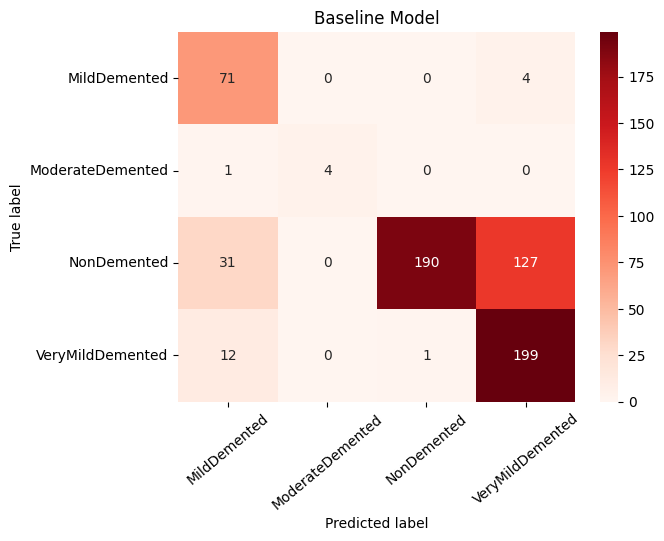

              precision    recall  f1-score   support

           0       0.62      0.95      0.75        75
           1       1.00      0.80      0.89         5
           2       0.99      0.55      0.71       348
           3       0.60      0.94      0.73       212

    accuracy                           0.73       640
   macro avg       0.80      0.81      0.77       640
weighted avg       0.82      0.72      0.72       640



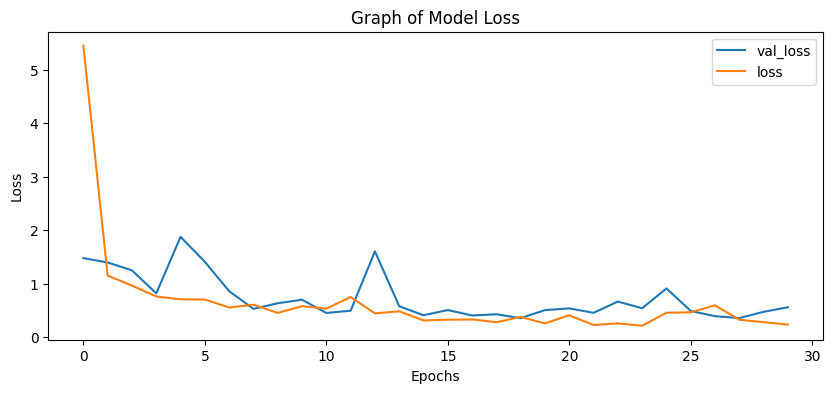

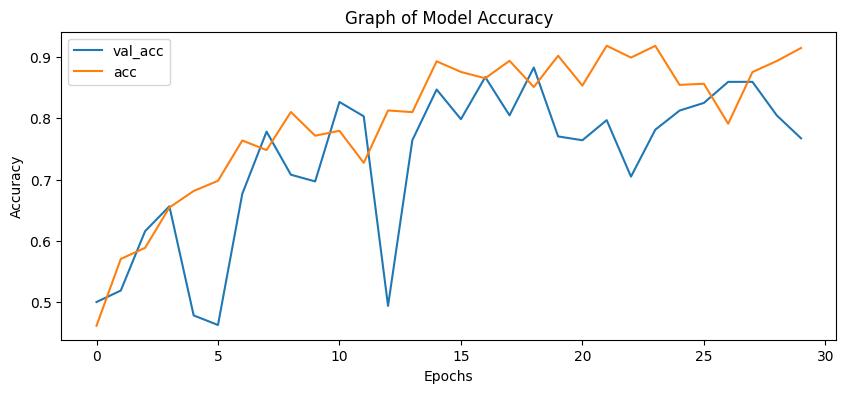

In [57]:
make_confusion_and_classification(baseline_model, 'Baseline Model')
visualize_model_performance(baseline_results)

In [66]:
model_1 = Sequential()

model_1.add(layers.Dense(128, activation='relu', input_shape=(109824,)))
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dropout(0.2))
model_1.add(layers.Dense(4, activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.01)

model_1.compile(optimizer='adam',metrics=['accuracy'], loss='categorical_crossentropy')
model_1.summary()

model_1_results = model_1.fit(X_train, y_train, epochs=100, batch_size=50,
                                  validation_data=(X_val, y_val), verbose=1, callbacks=early_stop)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               14057600  
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 4)                 260       
                                                                 
Total params: 14066116 (53.66 MB)
Trainable params: 14066116 (53.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
103/103 [==============================] - 4s 33ms/step - loss: 2.8813 - accuracy: 0.4561 - val_loss: 1.0045 - val_accuracy: 0.5469


/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


103/103 [==============================] - 3s 29ms/step - loss: 0.2719 - accuracy: 0.9006 - val_loss: 0.3235 - val_accuracy: 0.8969
Epoch 37/100
103/103 [==============================] - 3s 30ms/step - loss: 0.2384 - accuracy: 0.9092 - val_loss: 0.2783 - val_accuracy: 0.9109
Epoch 38/100
103/103 [==============================] - 3s 30ms/step - loss: 0.2433 - accuracy: 0.9053 - val_loss: 0.3723 - val_accuracy: 0.8438
Epoch 39/100
103/103 [==============================] - 3s 31ms/step - loss: 0.2170 - accuracy: 0.9209 - val_loss: 1.2558 - val_accuracy: 0.6313
Epoch 40/100
103/103 [==============================] - 3s 28ms/step - loss: 0.2632 - accuracy: 0.9020 - val_loss: 0.2670 - val_accuracy: 0.9109
Epoch 41/100
103/103 [==============================] - 3s 28ms/step - loss: 0.2175 - accuracy: 0.9166 - val_loss: 0.6169 - val_accuracy: 0.8047
Epoch 42/100
103/103 [==============================] - 3s 29ms/step - loss: 0.3013 - accuracy: 0.8813 - val_loss: 0.4351 - val_accuracy: 0.796

The Accuracy for the training group was 97.16796875
The Loss for the training group was 0.08713637292385101
--------------------------------------
The Accuracy for the test group was 89.3750011920929
The Loss for the test group was 0.34934160113334656
20/20 [==============================] - 0s 5ms/step


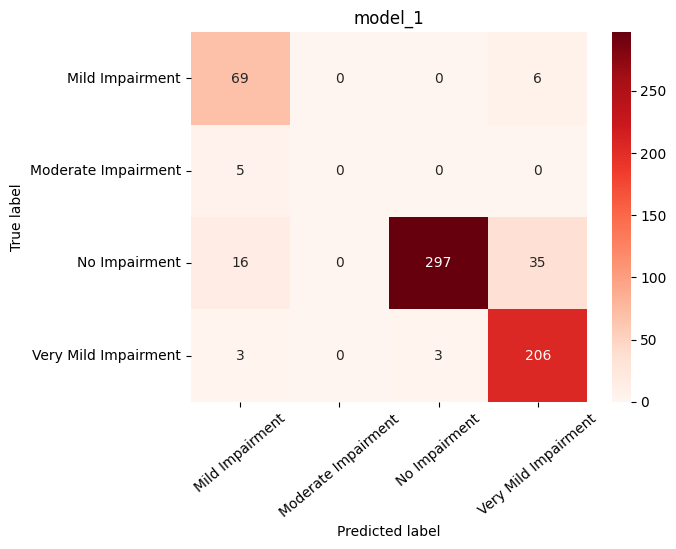

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        75
           1       0.00      0.00      0.00         5
           2       0.99      0.85      0.92       348
           3       0.83      0.97      0.90       212

    accuracy                           0.89       640
   macro avg       0.64      0.69      0.66       640
weighted avg       0.90      0.89      0.89       640



/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

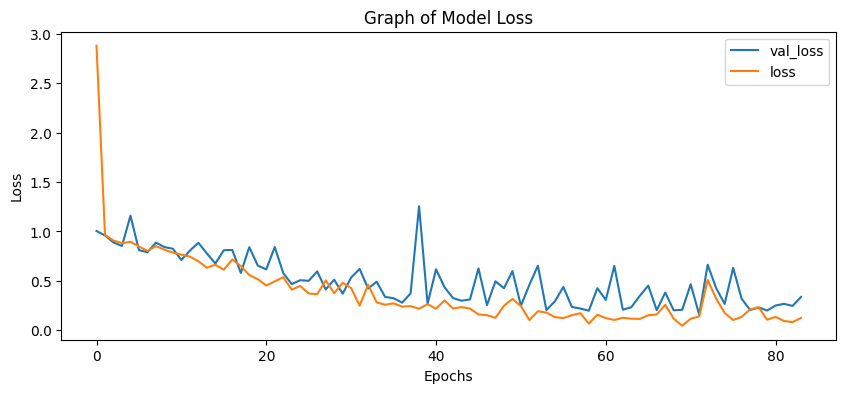

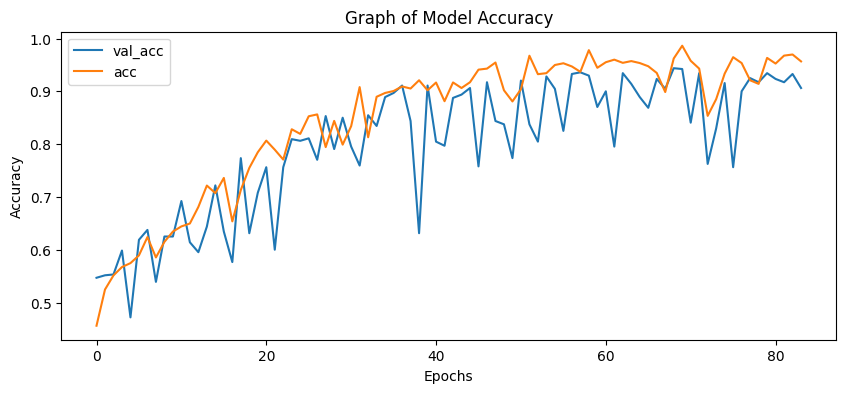

In [67]:
make_confusion_and_classification(model_1, 'model_1')
visualize_model_performance(model_1_results)

In [68]:
model_2 = Sequential()

model_2.add(layers.BatchNormalization(input_shape=(109824,)))
model_2.add(layers.Dropout(0.4))
model_2.add(layers.Dense(128, activation='relu'))
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dropout(0.2))
model_2.add(layers.Dense(4, activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.01)

model_2.compile(optimizer=opt,metrics=['accuracy'], loss='categorical_crossentropy')
model_2.summary()

model_2_results = model_2.fit(X_train, y_train, epochs=100, batch_size=50,
                                  validation_data=(X_val, y_val), verbose=1, callbacks=early_stop)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Bat  (None, 109824)            439296    
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 109824)            0         
                                                                 
 dense_18 (Dense)            (None, 128)               14057600  
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 4)                 260       
                                                      

The Accuracy for the training group was 50.0
The Loss for the training group was 1.0352193117141724
--------------------------------------
The Accuracy for the test group was 54.374998807907104
The Loss for the test group was 0.9910688400268555
20/20 [==============================] - 0s 7ms/step


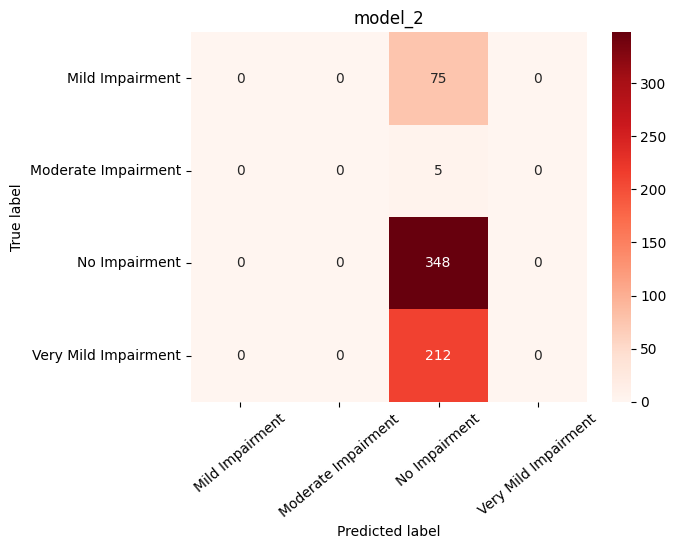

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        75
           1       0.00      0.00      0.00         5
           2       0.54      1.00      0.70       348
           3       0.00      0.00      0.00       212

    accuracy                           0.54       640
   macro avg       0.14      0.25      0.18       640
weighted avg       0.30      0.54      0.38       640



/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

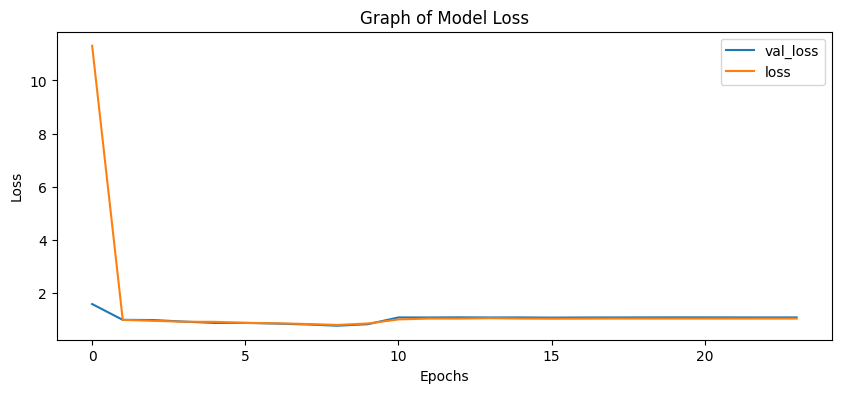

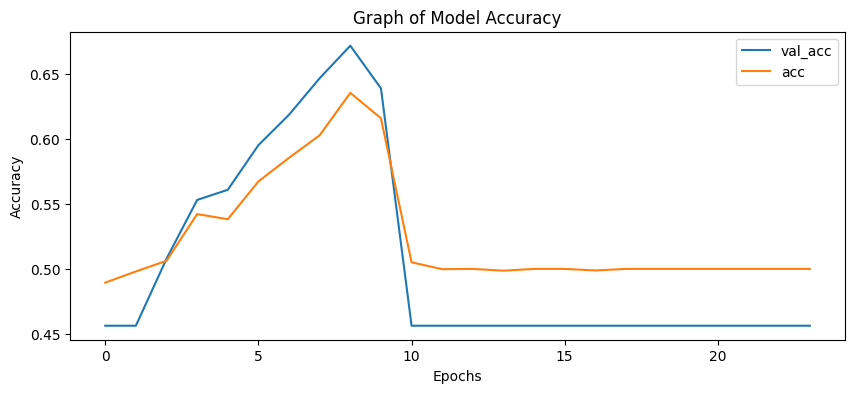

In [69]:
make_confusion_and_classification(model_2, 'model_2')
visualize_model_performance(model_2_results)

In [70]:
model_4 = Sequential()

model_4.add(layers.BatchNormalization(input_shape=(109824,)))
model_4.add(layers.Dropout(0.4))
model_4.add(layers.Dense(128, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dropout(0.2))
model_4.add(layers.Dense(4, activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

model_4.compile(optimizer=opt,metrics=['accuracy'], loss='categorical_crossentropy')
model_4.summary()

model_4_results = model_4.fit(X_train, y_train, epochs=100, batch_size=50,
                                  validation_data=(X_val, y_val), verbose=1, callbacks=early_stop)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Bat  (None, 109824)            439296    
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 109824)            0         
                                                                 
 dense_21 (Dense)            (None, 128)               14057600  
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 4)                 260       
                                                      

/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


103/103 [==============================] - 6s 55ms/step - loss: 0.1622 - accuracy: 0.9396 - val_loss: 0.1746 - val_accuracy: 0.9359
Epoch 11/100
103/103 [==============================] - 5s 52ms/step - loss: 0.1466 - accuracy: 0.9496 - val_loss: 0.1559 - val_accuracy: 0.9516
Epoch 12/100
103/103 [==============================] - 5s 52ms/step - loss: 0.1350 - accuracy: 0.9527 - val_loss: 0.1132 - val_accuracy: 0.9781
Epoch 13/100
103/103 [==============================] - 5s 52ms/step - loss: 0.0720 - accuracy: 0.9721 - val_loss: 0.0974 - val_accuracy: 0.9688
Epoch 14/100
103/103 [==============================] - 5s 52ms/step - loss: 0.0721 - accuracy: 0.9744 - val_loss: 0.1003 - val_accuracy: 0.9688
Epoch 15/100
103/103 [==============================] - 6s 57ms/step - loss: 0.1118 - accuracy: 0.9631 - val_loss: 0.2124 - val_accuracy: 0.9453
Epoch 16/100
103/103 [==============================] - 5s 52ms/step - loss: 0.1348 - accuracy: 0.9568 - val_loss: 0.1392 - val_accuracy: 0.956

The Accuracy for the training group was 98.10546636581421
The Loss for the training group was 0.07599067687988281
--------------------------------------
The Accuracy for the test group was 97.81249761581421
The Loss for the test group was 0.15962745249271393
20/20 [==============================] - 0s 7ms/step


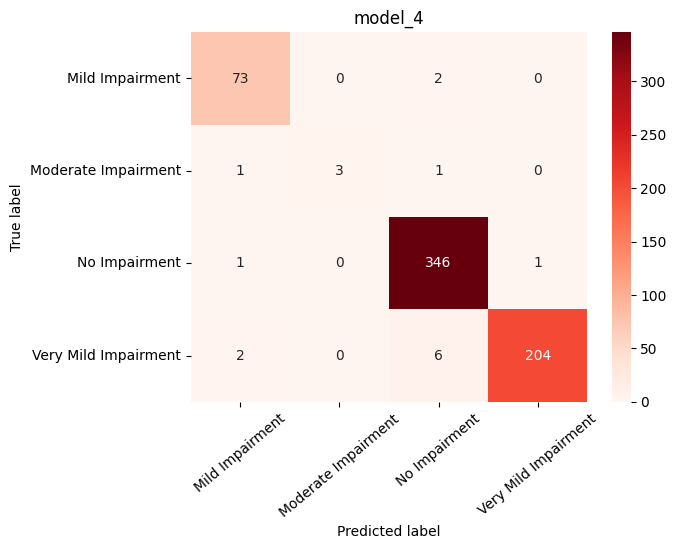

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        75
           1       1.00      0.60      0.75         5
           2       0.97      0.99      0.98       348
           3       1.00      0.96      0.98       212

    accuracy                           0.98       640
   macro avg       0.98      0.88      0.92       640
weighted avg       0.98      0.98      0.98       640



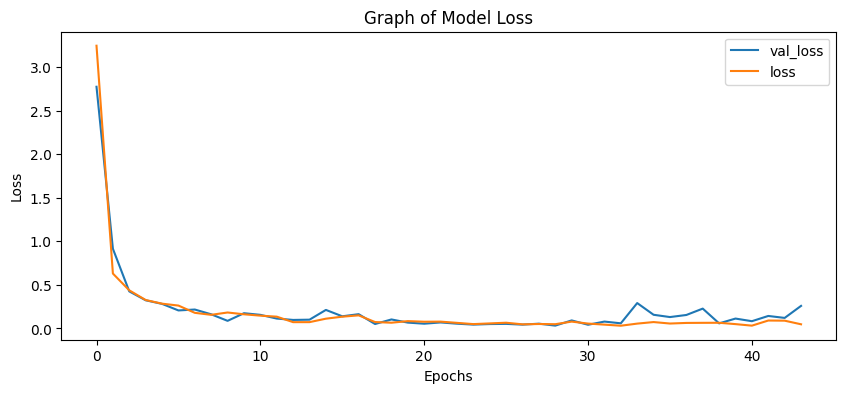

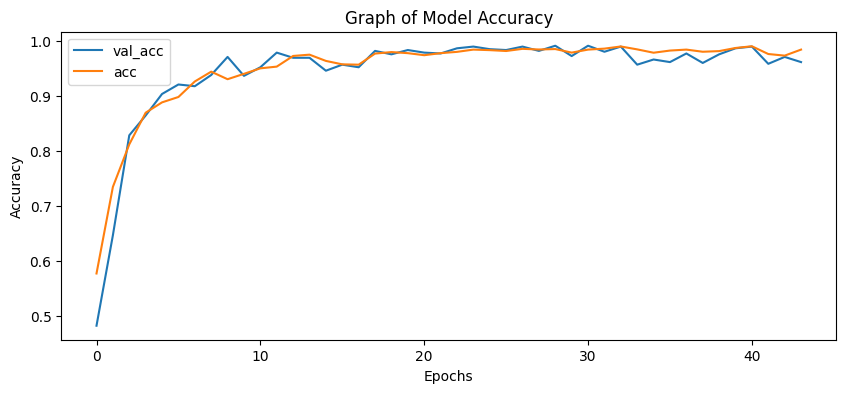

In [71]:
make_confusion_and_classification(model_4, 'model_4')
visualize_model_performance(model_4_results)

In [72]:
custom_model = Sequential([
    Input(shape=(109824,)),
    BatchNormalization(),
    Dropout(0.7),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(4, activation='softmax')        
], name = "cnn_model")

custom_model.summary()

OPT = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

custom_model.compile(optimizer='adam',loss=tf.losses.CategoricalCrossentropy(),metrics=['accuracy'])

Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_5 (Bat  (None, 109824)            439296    
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 109824)            0         
                                                                 
 dense_24 (Dense)            (None, 128)               14057600  
                                                                 
 batch_normalization_6 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                82

In [84]:
custom_model_results = custom_model.fit(X_train, y_train, epochs=100, batch_size=50,
                                  validation_data=(X_val, y_val), verbose=1, callbacks=early_stop)

Epoch 1/100
103/103 [==============================] - 6s 55ms/step - loss: 0.5403 - accuracy: 0.7955 - val_loss: 0.4653 - val_accuracy: 0.8250
Epoch 2/100
103/103 [==============================] - 6s 55ms/step - loss: 0.4177 - accuracy: 0.8426 - val_loss: 0.3412 - val_accuracy: 0.8687
Epoch 3/100
103/103 [==============================] - 6s 55ms/step - loss: 0.3620 - accuracy: 0.8566 - val_loss: 0.2306 - val_accuracy: 0.9328
Epoch 4/100
103/103 [==============================] - 7s 65ms/step - loss: 0.3062 - accuracy: 0.8865 - val_loss: 0.2271 - val_accuracy: 0.9109
Epoch 5/100
103/103 [==============================] - 6s 57ms/step - loss: 0.2907 - accuracy: 0.8939 - val_loss: 0.1894 - val_accuracy: 0.9266
Epoch 6/100
103/103 [==============================] - 6s 57ms/step - loss: 0.2752 - accuracy: 0.8998 - val_loss: 0.1407 - val_accuracy: 0.9547
Epoch 7/100
103/103 [==============================] - 6s 54ms/step - loss: 0.2147 - accuracy: 0.9203 - val_loss: 0.0960 - val_accuracy:

/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


103/103 [==============================] - 6s 62ms/step - loss: 0.0772 - accuracy: 0.9723 - val_loss: 0.0213 - val_accuracy: 0.9906
Epoch 39/100
103/103 [==============================] - 6s 61ms/step - loss: 0.0802 - accuracy: 0.9695 - val_loss: 0.0174 - val_accuracy: 0.9922
Epoch 40/100
103/103 [==============================] - 6s 55ms/step - loss: 0.0799 - accuracy: 0.9740 - val_loss: 0.0129 - val_accuracy: 0.9984
Epoch 41/100
103/103 [==============================] - 6s 55ms/step - loss: 0.0742 - accuracy: 0.9713 - val_loss: 0.0287 - val_accuracy: 0.9875
Epoch 42/100
103/103 [==============================] - 5s 52ms/step - loss: 0.0685 - accuracy: 0.9744 - val_loss: 0.0442 - val_accuracy: 0.9844
Epoch 43/100
103/103 [==============================] - 6s 56ms/step - loss: 0.0727 - accuracy: 0.9777 - val_loss: 0.0202 - val_accuracy: 0.9906
Epoch 44/100
103/103 [==============================] - 5s 52ms/step - loss: 0.0703 - accuracy: 0.9775 - val_loss: 0.0209 - val_accuracy: 0.995

The Accuracy for the training group was 100.0
The Loss for the training group was 0.0006565845687873662
--------------------------------------
The Accuracy for the test group was 100.0
The Loss for the test group was 0.006464698351919651
20/20 [==============================] - 0s 6ms/step


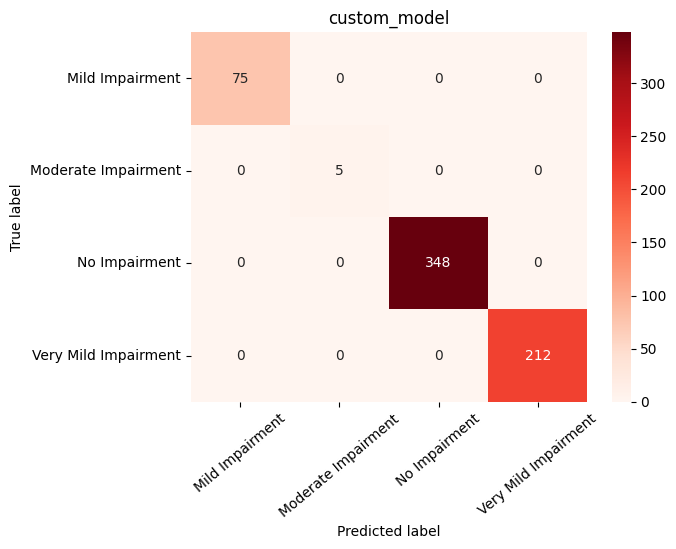

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00       348
           3       1.00      1.00      1.00       212

    accuracy                           1.00       640
   macro avg       1.00      1.00      1.00       640
weighted avg       1.00      1.00      1.00       640



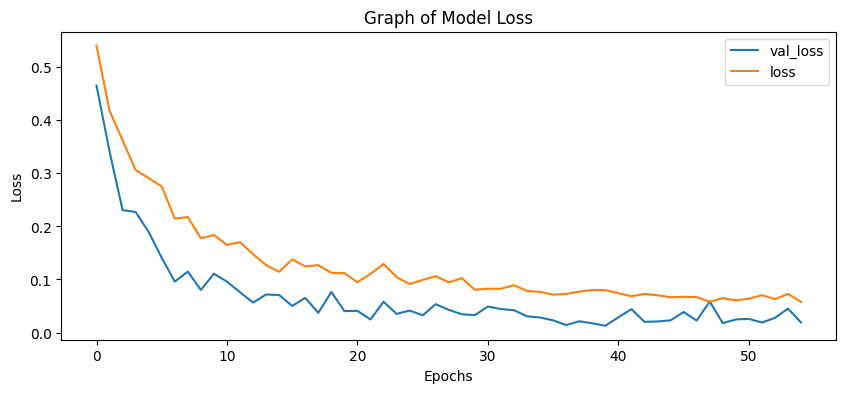

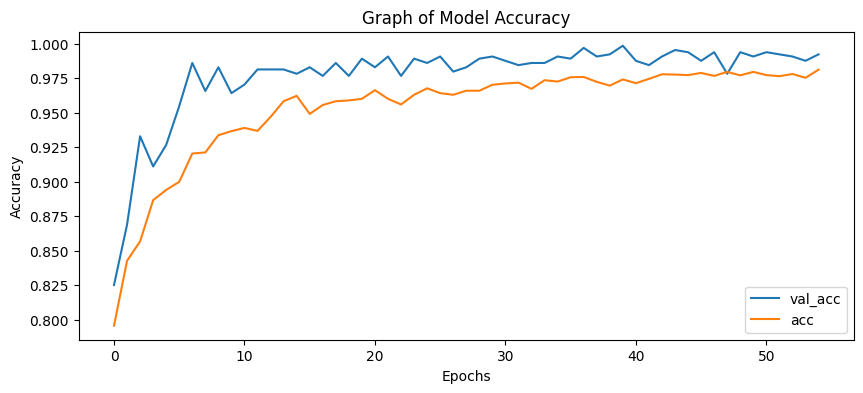

In [85]:
make_confusion_and_classification(custom_model, 'custom_model')
visualize_model_performance(custom_model_results)

## K Nearest Neighbors Classifier


In [ ]:
knn_baseline = KNeighborsClassifier(n_jobs=-1)
knn_baseline.fit(X_train, y_train)

In [ ]:
print(classification_report(y_rem, knn_baseline.predict(X_rem), target_names=classes))



In [ ]:
print('Training score:', knn_baseline.score(X_train, y_train) * 100)
print('Test Score:', knn_baseline.score(X_rem, y_rem) * 100)


# Creating Synthetic MRIs to Balance classes

In [89]:
#Pulling images from the data directory 
data = ImageDataGenerator(rescale=1/255).flow_from_directory(train_directory,
                                target_size = (224, 224),
                                batch_size = 5121,
                                seed = 42, shuffle=False)
train_images, train_labels = next(data)

Found 5121 images belonging to 4 classes.


In [100]:
#Augmeneting minority classes

#create image generators
ImageDataGenerator(rescale=1/255,  )
hshift = ImageDataGenerator(rescale=1./255,width_shift_range=(-40,40))
vshift = ImageDataGenerator(rescale=1./255,height_shift_range=(-40,40))
rotation = ImageDataGenerator(rescale=1./255,rotation_range=90)
shear = ImageDataGenerator(rescale=1./255,shear_range=45)
hvflip = ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True)
bright = ImageDataGenerator(rescale=1./255,brightness_range=(.2,1))
bright_rot = ImageDataGenerator(rescale=1./255,brightness_range=(.2,1),rotation_range=90)


augmentors = [hflip,vflip,hshift,vshift,rotation,shear,hvflip,bright,bright_rot]

#iterate through augmentors and generate augmented image sets
mild_augmented = []
mod_augmented = []

for augmentor in augmentors[:2]:

    aug_mild = augmentor.flow_from_directory( 
        train_directory, 
        target_size=(224, 224), 
        batch_size = 717, 
        seed = 123,
        classes= ['MildDemented'])
    
    mild_augmented.append(aug_mild)

for augmentor in augmentors:    

    aug_moderate = augmentor.flow_from_directory( 
        train_directory, 
        target_size=(224, 224), 
        batch_size = 52, 
        seed = 123,
        classes= ['ModerateDemented'])
    
    mod_augmented.append(aug_moderate)
    

#extract image matricies from generators and separate out images matricies from labels
data_mild_aug = [next(mild) for mild in mild_augmented]  
data_mod_aug = [next(mod) for mod in mod_augmented]

mild_aug_images = [images[0] for images in data_mild_aug]
mod_aug_images = [images[0] for images in data_mod_aug]

#concat all matricies together
concat_mild_images = np.vstack(mild_aug_images)
concat_mod_images = np.vstack(mod_aug_images)

#create label matricies 
concat_mild_labels = np.array([[1.,0.,0.,0.] for i in range(len(concat_mild_images))])
concat_mod_labels = np.array([[0.,1.,0.,0.] for i in range(len(concat_mod_images))])

#concat back to original training data
train_images_aug = np.concatenate((train_images,concat_mild_images,concat_mod_images))
train_labels_aug = np.concatenate((train_labels,concat_mild_labels,concat_mod_labels))


Found 717 images belonging to 1 classes.
Found 717 images belonging to 1 classes.
Found 52 images belonging to 1 classes.
Found 52 images belonging to 1 classes.
Found 52 images belonging to 1 classes.
Found 52 images belonging to 1 classes.
Found 52 images belonging to 1 classes.
Found 52 images belonging to 1 classes.
Found 52 images belonging to 1 classes.
Found 52 images belonging to 1 classes.
Found 52 images belonging to 1 classes.


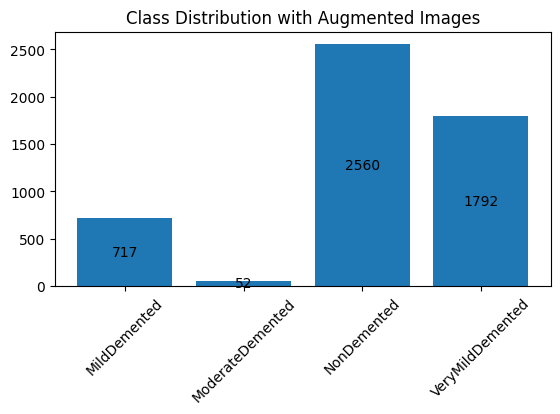

In [101]:
train_bars = plt.bar(['MildDemented','ModerateDemented','NonDemented','VeryMildDemented'], sum(train_labels))
plt.xticks(rotation=45)
plt.bar_label(train_bars, label_type='center')
plt.title('Class Distribution with Augmented Images')
plt.gcf().subplots_adjust(bottom=0.35)

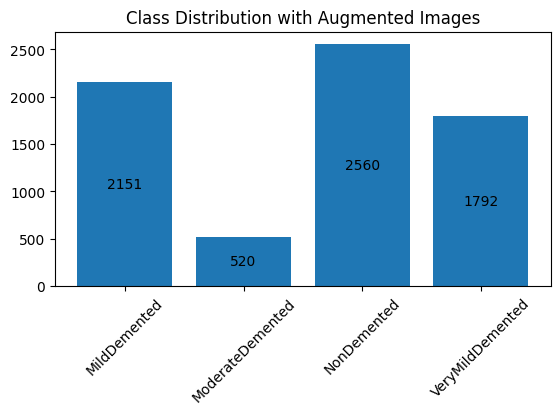

In [102]:
aug_bars = plt.bar(['MildDemented','ModerateDemented','NonDemented','VeryMildDemented'], sum(train_labels_aug))
plt.xticks(rotation=45)
plt.bar_label(aug_bars, label_type='center')
plt.title('Class Distribution with Augmented Images')
plt.gcf().subplots_adjust(bottom=0.35)

In [107]:
print(train_images_aug.shape)
train_images_aug = train_images_aug.reshape(7023, 150528)

(7023, 224, 224, 3)


In [108]:
model_4 = Sequential()

model_4.add(layers.BatchNormalization(input_shape=(150528,)))
model_4.add(layers.Dropout(0.4))
model_4.add(layers.Dense(128, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dropout(0.2))
model_4.add(layers.Dense(4, activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

model_4.compile(optimizer=opt,metrics=['accuracy'], loss='categorical_crossentropy')
model_4.summary()

model_4_results = model_4.fit(train_images_aug, train_labels_aug, epochs=100, batch_size=50,
                                  validation_data=(X_val, y_val), verbose=1, callbacks=early_stop)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_9 (Bat  (None, 150528)            602112    
 chNormalization)                                                
                                                                 
 dropout_15 (Dropout)        (None, 150528)            0         
                                                                 
 dense_30 (Dense)            (None, 128)               19267712  
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 4)                 260       
                                                      

ValueError: in user code:

    File "/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/keras/src/engine/training.py", line 1972, in test_function  *
        return step_function(self, iterator)
    File "/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/keras/src/engine/training.py", line 1956, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/keras/src/engine/training.py", line 1944, in run_step  **
        outputs = model.test_step(data)
    File "/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/keras/src/engine/training.py", line 1850, in test_step
        y_pred = self(x, training=False)
    File "/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 150528), found shape=(None, 109824)
